# Compare Algorithms using IRIS DataSet

In [3]:
# -*- coding: utf-8 -*-
############################################################################
# This is an end-2-end Applied Machine Learning Script with RDBMS
# Title: Comparing Different Machine Learning Algorithms in Python (for Classification)
# Knowledge required: Basic Python, Scikit-Learn and MySQL
# System requirements:
#   a) Python (3.X) distribution from Anaconda (Anaconda 3)
#   b) MySQL 5.7 with an user: root and password:
############################################################################

"""
@author: 
    Nilimesh Halder, PhD
    BSc in Computer Science and Engineering, 
        @ Khulna University, Bangladesh.
    PhD in Artificial Intelligence and Applied Machine Learning, 
        @ The University of Western Australia, Australia.
"""

# -----------------------------------------------------------------------------
# Steps in Applied Machine Learning:
# 1. Load Library
# 2. Load Dataset to which Machine Learning Algorithm to be applied
#    Either a) load from a CSV file or b) load from a Database   
# 3. Summarisation of Data to understand dataset (Descriptive Statistics)
# 4. Visualisation of Data to understand dataset (Plots, Graphs etc.)
# 5. Data pre-processing & Data transformation (split into train-test datasets)
# 6. Application of a Machine Learning Algorithm to training dataset 
#   a) setup a ML algorithm and parameter settings
#   b) cross validation setup with training dataset
#   c) training & fitting Algorithm with training Dataset
#   d) evaluation of trained Algorithm (or Model) and result
#   e) saving the trained model for future prediction
# 7. Finalise the trained model and make prediction            
# -----------------------------------------------------------------------------

import warnings
warnings.filterwarnings("ignore")

In [4]:
# 1. Load necessary libraries
import sqlalchemy as sa
#import numpy as np
import pandas as pd
import pickle as pk
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [14]:
## --- Load DataSet from CSV file
def loadFrCSVFile(filename):
    print(filename)
    col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
    dataset = pd.read_csv(filename, names=col_names)
    return dataset
    

In [15]:
irisData= loadFrCSVFile('irisData.csv')

irisData.csv


In [16]:
irisData.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
## --- Import DataSet to a MySQL Database
def import2MySQL(dataset):
    engine_str = (
            'mysql+pymysql://{user}:{password}@{server}/{database}'.format(
            user      =  'root',
            password  =  'root888',
            server    =  'localhost',
            database  =  'DataScienceRecipes'))
    
    engine = sa.create_engine(engine_str)
    conn = engine.connect()
    
    #check whether connection is Successful or not
    #if (conn): print("MySQL Connection is Successful ... ... ...")    
    #else:      print("MySQL Connection is not Successful ... ... ...")
    
    dataset.to_sql(name='irisdata', con=engine, schema='datasciencerecipes', 
                   if_exists = 'replace', chunksize = 1000, index=False)
    conn.close()
    
## --- Load DataSet from MySQL Database to Pandas a DataFrame
def loadDataSetFrMySQLTable():
    engine_str = (
            'mysql+pymysql://{user}:{password}@{server}/{database}'.format(
            user      =  'root',
            password  =  'root888',
            server    =  'localhost',
            database  =  'datasciencerecipes'))
    
    engine = sa.create_engine(engine_str)
    conn = engine.connect()
    
    #check whether connection is Successful or not
    #if (conn): print("MySQL Connection is Successful ... ... ...")    
    #else:      print("MySQL Connection is not Successful ... ... ...")
    
    # MySQL Query with few generated Attributes/Features
    query = '''
    SELECT  sepal_length, 
            sepal_width, 
            petal_length, 
            petal_width, 
            round(sepal_length/sepal_width,2) as ratio1, 
            round(sepal_width/petal_length,2) as ratio2,
            round(petal_length/petal_width,2) as ratio3,
            round(petal_width/sepal_length,2) as ratio4,
            round(sepal_width/sepal_length,2) as ratio5, 
            round(petal_length/sepal_width,2) as ratio6,
            round(petal_width/petal_length,2) as ratio7,
            round(sepal_length/petal_width,2) as ratio8,
            class 
    FROM irisdata;
    '''
    
    query_result = conn.execute(query)
    dataset =  pd.DataFrame(query_result.fetchall(), 
                            columns =  query_result.keys())
    print('DataFrame Size',dataset.shape);
    print('ROW',dataset.shape[0]);print('COLUMN',dataset.shape[1]);
    conn.close()
    return dataset

In [12]:
## --- Data Summarisation (Descriptive Statistics)
def summariseDataset(dataset):
    cols1 = ['sepal_length','sepal_width','petal_length','petal_width']
    cols2 = ['ratio1','ratio2','ratio3','ratio4']
    cols3 = ['ratio5','ratio6','ratio7','ratio8']    
    # shape
    print(dataset[cols1].shape)
    print(dataset[cols2].shape)
    print(dataset[cols3].shape)    
    # head
    print(dataset[cols1].head(5))
    print(dataset[cols2].head(5))
    print(dataset[cols3].head(5))    
    # descriptions
    print(dataset[cols1].describe())
    print(dataset[cols2].describe())    
    print(dataset[cols3].describe())
    # class distribution
    print(dataset.groupby('class').size())
    

In [18]:
## --- Data Visualisation to understand Data
def visualiseDataset(dataset):
    cols1 = ['sepal_length','sepal_width','petal_length','petal_width']
    cols2 = ['ratio1','ratio2','ratio3','ratio4']
    cols3 = ['ratio5','ratio6','ratio7','ratio8'] 
    
    # box and whisker plots
    dataset[cols1].plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(12,12))
    pyplot.show()
    dataset[cols2].plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(12,12))
    pyplot.show()
    dataset[cols3].plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(12,12))
    pyplot.show()    
    # histograms
    dataset[cols1].hist(figsize=(12,12))
    pyplot.show()
    dataset[cols2].hist(figsize=(12,12))
    pyplot.show()
    dataset[cols3].hist(figsize=(12,12))
    pyplot.show()    
    # scatter plot matrix
    scatter_matrix(dataset[cols1], figsize=(12,12))
    pyplot.show()
    scatter_matrix(dataset[cols2], figsize=(12,12))
    pyplot.show()
    scatter_matrix(dataset[cols3], figsize=(12,12))
    pyplot.show()    

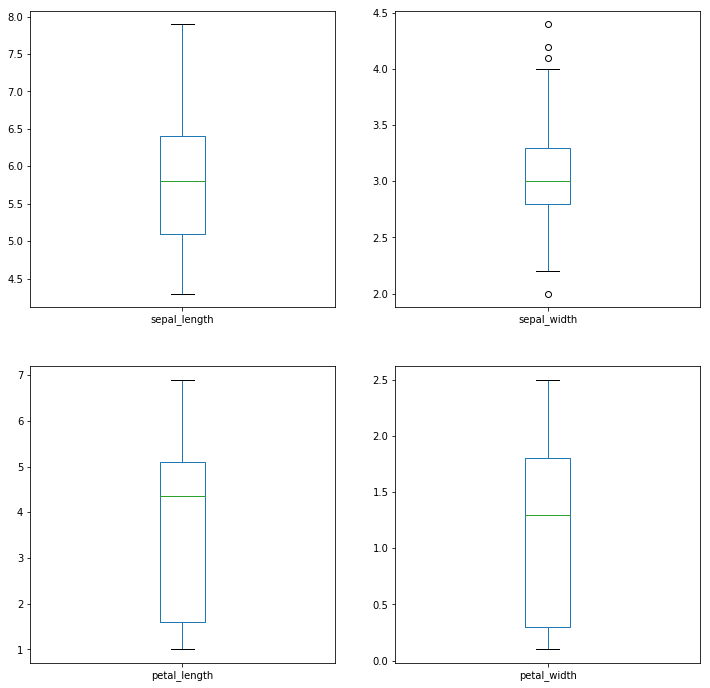

KeyError: "['ratio1' 'ratio2' 'ratio3' 'ratio4'] not in index"

In [19]:
visualiseDataset(irisData)

In [2]:
## --- Data Pre-Processing
def preProcessingData(dataset):
    # 1. Data Cleaning
      # There is no missing value. 
      # We could "Outlier treatment" but nothing was done here.  
    
    # 2. Feature Selection
    cols_X = ['sepal_length','sepal_width','petal_length','petal_width',
              'ratio1','ratio2','ratio3','ratio4',
              'ratio5','ratio6','ratio7','ratio8']
    cols_Y = 'class'
    
    # 3. Data Transform - Split out train : test datasets
    train_X, test_X, train_Y, test_Y = train_test_split(dataset.loc[:, cols_X], 
                                                        dataset.loc[:, cols_Y], 
                                                        test_size=0.33,
                                                        )
    return train_X, test_X, train_Y, test_Y

## --- Applied Machine Learning Algorithm ... ... ...
def evaluateAlgorithm(train_X, test_X, train_Y, test_Y):
    ##Machine Lreaning Algorithm, Parameter setting 
    
    ## Compare different ML Algorithms with default parameter setting    
    model_List = []
    model_List.append(('LR',    'Logistic Regression',          LogisticRegression()))
    model_List.append(('LDA',   'Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
    model_List.append(('KNN',   'K Neighbors Classifier',       KNeighborsClassifier()))
    model_List.append(('CART',  'DecisionTreeClassifier',       DecisionTreeClassifier()))
    model_List.append(('NB',    'Naive Bayes',                  GaussianNB()))
    model_List.append(('SVM',   'Support Vector Machine ',      SVC()))    
    
    ##Cross Validation
    print("Cross Validation Results ")
    outcomes = []
    description = []
    shortDescription = []
    for shtDes, des, model in model_List:
        cv_results = cross_val_score(model, train_X, train_Y, cv = 3, 
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        outcomes.append(cv_results)
        description.append(des)
        shortDescription.append(shtDes)
        prt_string = "\n %s:\n \tMean Accuracy: %f (Std: %f)" % (des, cv_results.mean()
                                                                    , cv_results.std())
        print(prt_string)
        
    ##Visualise the outcomes / results from Cross Validation
    fig = pyplot.figure(figsize = (12,12))
    fig.suptitle('Cross Validation Results (Algorithm Comparison)')
    ax = fig.add_subplot(111)
    pyplot.boxplot(outcomes)
    ax.set_xticklabels(shortDescription)
    pyplot.show()
    
    ##Training & Fitting of each Algorithm with training Dataset
    print('\nEvaluate Algorithms (Accuracy, Classification Report, Confusion Matrix) ... ... ... ')
    
    for shtDes, des, model in model_List:   
        
        #model fitting or training
        trained_Model = model.fit(train_X, train_Y)
        
        ##Evaluation of trained Algorithm (or Model) and result
        pred_Class          = trained_Model.predict(test_X)
        acc         = accuracy_score(test_Y, pred_Class)
        classReport = classification_report(test_Y, pred_Class)
        confMatrix  = confusion_matrix(test_Y, pred_Class) 

        print("\n%s: " % (des))
        print('The accuracy: {}'.format(acc))
        print('The Classification Report:\n {}'.format(classReport))
        print('The Confusion Matrix:\n {}'.format(confMatrix))

        #Save the trained Model
        with open('model_'+shtDes+'.pickle', 'wb') as f:
                pk.dump(trained_Model, f)

## --- Load a (new or existing ) dataset to make prediction 
def loadPredictionDataset():
    engine_str = (
            'mysql+pymysql://{user}:{password}@{server}/{database}'.format(
            user      =  'root',
            password  =  'root888',
            server    =  'localhost',
            database  =  'datasciencerecipes'))
    
    engine = sa.create_engine(engine_str)
    conn = engine.connect()
    
    #check whether connection is Successful or not
    #if (conn): print("MySQL Connection is Successful ... ... ...")    
    #else:      print("MySQL Connection is not Successful ... ... ...")
    
    # MySQL Query - New Query is required for Prediction DataSet
    query = '''
    SELECT  sepal_length, 
            sepal_width, 
            petal_length, 
            petal_width, 
            round(sepal_length/sepal_width,2) as ratio1, 
            round(sepal_width/petal_length,2) as ratio2,
            round(petal_length/petal_width,2) as ratio3,
            round(petal_width/sepal_length,2) as ratio4,
            round(sepal_width/sepal_length,2) as ratio5, 
            round(petal_length/sepal_width,2) as ratio6,
            round(petal_width/petal_length,2) as ratio7,
            round(sepal_length/petal_width,2) as ratio8
    FROM irisdata;
    '''
    
    query_result = conn.execute(query)
    dataset =  pd.DataFrame(query_result.fetchall(), 
                            columns =  query_result.keys())
    conn.close()
    return dataset

## --- Load the trained model and make prediction
def loadTrainedModelForPrediction(pred_dataset):
    # trained models are: 
    # model_LR, model_LDA, model_KNN, model_CART, model_NB, model_SVM
    f = open('model_LDA.pickle', 'rb')
    model = pk.load(f); f.close();
    pred_Class = model.predict(pred_dataset)
    pred_dataset.loc[:, 'classResult'] = pred_Class
    return pred_dataset

## --- Finalise the results and update the audiance
def finaliseResult(result):
    
    #Save Result in a CSV file
    result.to_csv('finalResult.csv', index = False)
    print("\n\nSave Result in a CSV file ... ... Done ...")    
    
    #Save Result in a MySQl Table
    engine_str = (
            'mysql+pymysql://{user}:{password}@{server}/{database}'.format(
            user      =  'root',
            password  =  'root888',
            server    =  'localhost',
            database  =  'datasciencerecipes'))
    
    engine = sa.create_engine(engine_str)
    conn = engine.connect()
    
    #check whether connection is Successful or not
    #if (conn): print("MySQL Connection is Successful ... ... ...")    
    #else:      print("MySQL Connection is not Successful ... ... ...")
    
    result.to_sql(name='irisresult', con=engine, schema='datasciencerecipes', 
                   if_exists = 'replace', chunksize = 1000, index=False)
    print("Save Result in a MySQl Table ... ... Done ...")        
    conn.close()

# End-to-End Applied Machine Learning Recipes for Developers    

if __name__ == '__main__':
    filename = 'iris.data.csv'
    
    # 2. Load Dataset to which Machine Learning Algorithm to be applied
    dataset = loadFrCSVFile(filename)
    import2MySQL(dataset)
    dataset = loadDataSetFrMySQLTable()
    
    # 3. Summarisation of Data to understand dataset (Descriptive Statistics)
    summariseDataset(dataset)
    
    # 4. Visualisation of Data to understand dataset (Plots, Graphs etc.)
    visualiseDataset(dataset)
    
    # 5. Data pre-processing and Data transformation (split into train-test datasets)
    train_X, test_X, train_Y, test_Y = preProcessingData(dataset)
    
    # 6. Application of a Machine Learning Algorithm to training dataset 
    evaluateAlgorithm(train_X, test_X, train_Y, test_Y)
    
    # 7. Load the saved model and apply it to new dataset for prediction 
    pred_Dataset = loadPredictionDataset()
    result = loadTrainedModelForPrediction(pred_Dataset)
    finaliseResult(result)
    
    print('\nEnd-to-End Applied Machine Learning Recipes for Developers\n')

iris.data.csv


FileNotFoundError: File b'iris.data.csv' does not exist